<a href="https://colab.research.google.com/github/GuptaRitik/Text_clustering_basics/blob/main/Self_Project_Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







### In your <b>Capstone project</b>, you will perform clustering on documents to find relevant themes/topics. We call this Topic Modeling. There are different algorithms for building a topic model such as Latent Dirichlet Allocation (LDA), NMF etc. For now you are only expected to use the clustering algorithms discussed so far.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
dataset = fetch_20newsgroups(download_if_missing=True)

In [4]:
news_list = dataset.data

In [5]:
news_list[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [6]:
len(news_list)

11314

We can face problem in clustering with sch huge data so we can reduce our data to 1000

In [7]:
news_list = news_list[-1000:]

# tokenize the snntences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(news_list)

In [8]:
#converting to dataframe
df = pd.DataFrame(np.array(news_list).reshape(-1,1), columns=['text'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [10]:
df.head()

,text
0,Organization: University of Illinois at Chicag...
1,From: parr@acs.ucalgary.ca (Charles Parr)\nSub...
2,From: bspahh@gdr.bath.ac.uk (Andrew Henry)\nSu...
3,From: rjl+@pitt.edu (Richard J. Loether)\nSubj...
4,From: hagenjd@wfu.edu (Jeff Hagen)\nSubject: R...


In [11]:
df['no_of_words'] = df['text'].apply(lambda x: (x.count(' ')+1))

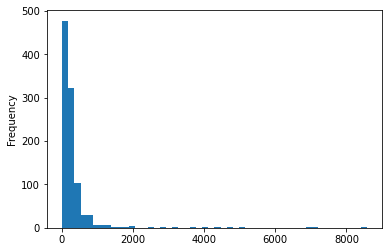

In [12]:
df['no_of_words'].plot(bins=50, kind='hist')

## Text Preprocessing

Removing Punctuations and Stopworkds from text data, we ewill use NLTK library for this.

In [104]:
import nltk
nltk.download('stopwords')
import string, unicodedata
from nltk.corpus import stopwords
import inflect


def noise_remover(msg):
    """ Removing punctuation and stop words"""
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])



def remove_non_ascii(word):
    """Remove non-ASCII characters from list of tokenized words"""
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_word






def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words.split():
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return ' '.join(new_words)




def preprocess(words):
    words = remove_non_ascii(words)
    words = noise_remover(words)
    words = replace_numbers(words)      
    return words 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# applying the preprocessing on the textual data
df['new_txt'] = df['text'].apply(preprocess)

In [107]:
df.head() # updated data

,text,no_of_words,new_txt
0,"Organization: University of Illinois at Chicago, academic Computer Center\nFrom: <U23590@uicvm.uic.edu>\nSubject: Cripple Chip\nLines: 19\n\nHow about this: The\nTelCo has your Clipper key. The TelCo\nhas your intended partner's key, if he is\nusing one. Whenever you call, the message\ngets decrypted and reencrypted wihtout\ny key exchange. I know it's a stupid\nsystem, but for the feds, it'd be\ngreat. The point of this isn;t to\ntake over the crypto market, BTW. Clinton\ndoen not want people to have any sort of crypto at\nall (just like Busch). But he needs some support\nfor the ""technology initiative"" garbage he's\npushing (industrial policy stuff) and a computer\nhip designed by the gov't is just the thing.\n\nWho's going to thing about the (literal) Billions of\nDollars it took for a government agency to design?\n\n-watkins@earth.eecs.uic.edu\n",124,Organization University Illinois Chicago academic Computer Center U23590uicvmuicedu Subject Cripple Chip Lines nineteen TelCo Clipper key TelCo intended partners key using one Whenever call message gets decrypted reencrypted wihtout key exchange know stupid system feds itd great point isnt take crypto market BTW Clinton doen want people sort crypto like Busch needs support technology initiative garbage hes pushing industrial policy stuff computer hip designed govt thing Whos going thing literal Billions Dollars took government agency design watkinseartheecsuicedu
1,"From: parr@acs.ucalgary.ca (Charles Parr)\nSubject: Re: insect impacts\nNntp-Posting-Host: acs3.acs.ucalgary.ca\nOrganization: The University of Calgary, Alberta\nLines: 36\n\nIn article <2385@emoryu1.cc.emory.edu> labrg@emory.edu (Ryan Montieth Gill) writes:\n>\n>\tFor those who have had problems with small birds what about the\n>\tlarge raptor types when they are swooping across the road after\n>\tsmallish prey?? I had a hawk, Falcon what ever come within 5\n>\tfeet of me, lucky for him (or me for that matter) he noticed me\n>\tand my, and pulled up on his/her trajectory at the last moment.\n>\tScared the shit outa me...nothing like a red tailed hawk in the\n>\tface, Talons and all....I wonder if riding a Nighthawk has\n>\tanything to do with it....hmmmm?\n>\n>\t\t\tRyan\n>\t\t\t0780\n\nI got a male Mallard duck in the chest once.\n\nIt was like being kicked by my karate instructor.\n\nNo accident, but my eyes were tearing so hard, and I was wheezing\nso loudly, that it's quite remarkable that I was able to come\nto a stop with the rubber side up.\n\nThe duck, BTW, lived, and seemed quite healthy, though we both\nsat by the roadside and shook our heads for a few minutes.\n\nThe bruise went from my right collar bone all the way down to\nmy belly button.\n\nRegards, Charles\nDoD0.001\nRZ350\n-- \nWithin the span of the last few weeks I have heard elements of\nseparate threads which, in that they have been conjoined in time,\nstruck together to form a new chord within my hollow and echoing\ngourd. --Unknown net.person\n",220,parracsucalgaryca Charles Parr Subject insect impacts NntpPostingHost acs3acsucalgaryca Organization University Calgary Alberta Lines thirty-six article 2385emoryu1ccemoryedu labrgemoryedu Ryan Montieth Gill writes problems small birds large raptor types swooping across road smallish prey hawk Falcon ever come within five feet lucky matter noticed pulled hisher trajectory last moment Scared shit outa menothing like red tailed hawk face Talons allI wonder riding Nighthawk anything ithmmmm Ryan seven hundred and eighty got male Mallard duck chest like kicked karate instructor accident eyes tearing hard wheezing loudly quite remarkable able come stop rubber side duck BTW lived seemed quite healthy though sat roadside shook heads minutes bruise went right collar bone way belly button Regards Charles DoD0001 RZ350 Within span last weeks heard elements separate threads conjoined time struck together form new chord within hollow echoing gourd Unknown netperson
2,"From: bs

Updated text looks clear to analyse.

In [108]:
df.to_csv('new_text_above')

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
# creating bag of workds from text data using TFIDF vectorizor

vectorizer = TfidfVectorizer(max_df=0.9, min_df=10)
x = vectorizer.fit_transform(df['new_txt'])

In [111]:
pd.set_option('display.max_colwidth', None)

In [112]:
len(vectorizer.get_feature_names_out()) # length of columns

1890

In [113]:
x = x.toarray() # converting sparse matrix into array

In [114]:
x = pd.DataFrame(x, columns=vectorizer.get_feature_names_out()) # converting array into dataframe to visually represent the changes

In [115]:
x

,1st,2nd,3d,ab,ability,able,absolutely,ac,accept,acceptable,...,yes,yesterday,yet,york,youd,youll,young,youre,youve,zero
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.097844,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.062673,0.0,0.057478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.080027,0.110971,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.096469,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.127698,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.102759,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
x.shape

(1000, 1890)

## Applying Clustering Algorithm

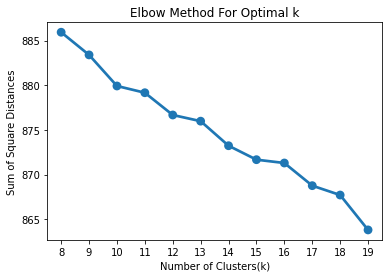

In [117]:
from sklearn.cluster import KMeans
import seaborn as sns

sum_of_sq_dist = {}
for k in range(8,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x) 
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

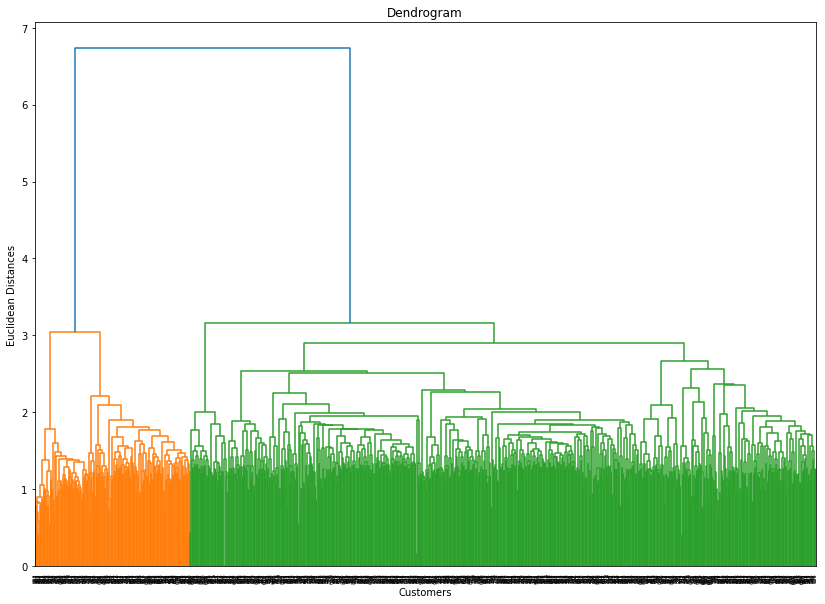

In [118]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

After an detailed though process by seing the dendrogram, i get an intution that we can have number of clusters to be morethan 10

Let's try some k for k means

In [119]:
km = KMeans(n_clusters= 14)
y_km = km.fit_predict(x) 

In [120]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_km)

0.0015493109855636718

In [121]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

silhouette_score(x, y_hc)

-0.006116268890687227

This is not performing well by analysing silhoutte score, we can try different technique.

## PCA
Lets apply Principal componet analysais on this data to reduce its dimentions

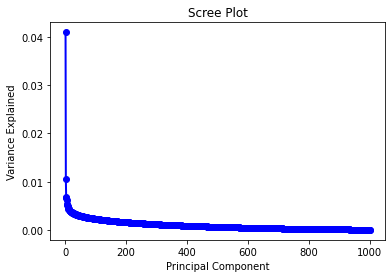

In [130]:
from sklearn.decomposition import PCA

pca = PCA()

pc_data = pca.fit_transform(x)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0.5, 1.0, 'No. of components VS Explained variance')

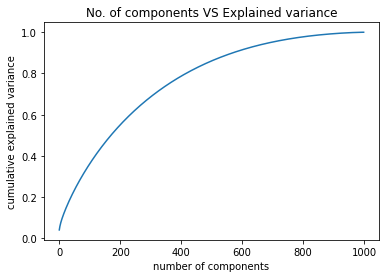

In [131]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance')

80% explained ratio would be considerable amount which is achievable through 400 components

In [132]:
pca = PCA(n_components=400)
pc_data = pca.fit_transform(x)

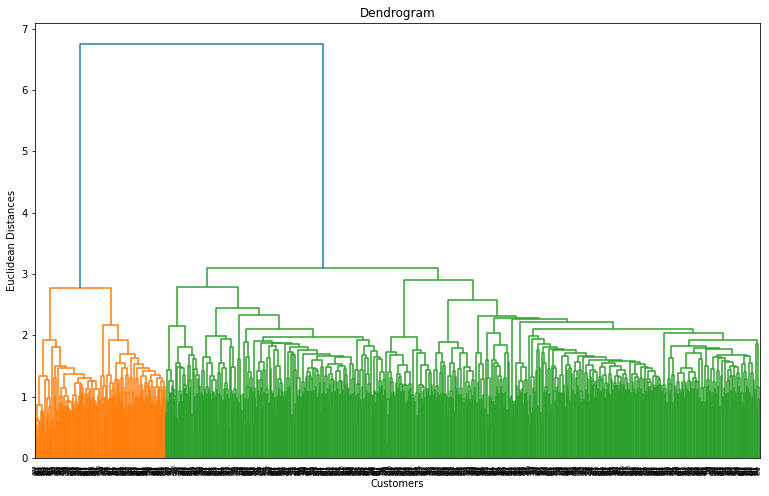

In [137]:

plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(pc_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

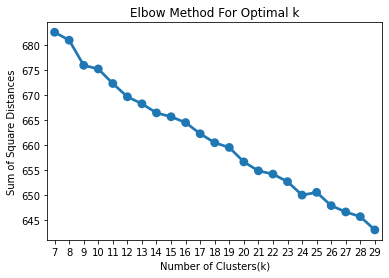

In [139]:
sum_of_sq_dist = {}
for k in range(7, 30):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(pc_data) 
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Lets visualize 2 components on scatter plot (2d plot)

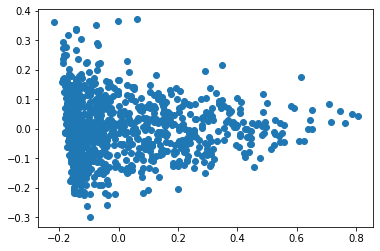

In [140]:
pca = PCA(n_components=2)

pc_data = pca.fit_transform(x)

plt.scatter(pc_data[:,0], pc_data[:,1])

0.3989272296972907


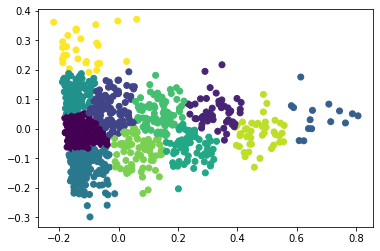

In [141]:
km = KMeans(n_clusters= 11)
y_km = km.fit_predict(pc_data)
print(silhouette_score(pc_data, y_km))

plt.scatter(pc_data[:,0], pc_data[:,1], c=y_km)


Lets visualize 3 components on a 3d plane

In [142]:
pca = PCA(n_components=3)
pc_data = pca.fit_transform(x)

# creating 10 clusters
km = KMeans(n_clusters= 10)
y_km = km.fit_predict(pc_data)
print(silhouette_score(pc_data, y_km))


#visualizing on plotly
import plotly.express as px
  

fig = px.scatter_3d(x = pc_data[:,0], 
                    y = pc_data[:,1], 
                    z = pc_data[:,2],
                    color = y_km)
  
fig.show()

0.29328837237100014


In [143]:
 print(sum(pca.explained_variance_ratio_))

0.05842022692642299
